For this workbook, we create a multiple linear regression model. All variables will be used. Luckily variables are of dtype=number.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [3]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
def wrangle(filepath):

    #load csv file
    df = pd.read_csv(filepath)

    #
    #mask value
    mask_val= df["value of homes"] < 30
    
    df=df[mask_val]

    #mask rooms
    low, high= df["Number of rooms"].quantile([0.10, 0.90])
    mask_rms=df["Number of rooms"].between(low, high)
    
    df= df[mask_rms] 
    #drop columns
   


    return df

In [5]:
df = wrangle("./boston_cleaned.csv")
df.head()

,Crime rate,Land zoned,Non-retail business,Charles river,Nitric oxide conc,Number of rooms,Age,Weighted distances,Radial highways,Tax rate,Pupil-teacher ratio,Proportion of blacks,Lower status,value of homes
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Crime rate            336 non-null    float64
 1   Land zoned            336 non-null    float64
 2   Non-retail business   336 non-null    float64
 3   Charles river         336 non-null    int64  
 4   Nitric oxide conc     336 non-null    float64
 5   Number of rooms       336 non-null    float64
 6   Age                   336 non-null    float64
 7   Weighted distances    336 non-null    float64
 8   Radial highways       336 non-null    int64  
 9   Tax rate              336 non-null    float64
 10  Pupil-teacher ratio   336 non-null    float64
 11  Proportion of blacks  336 non-null    float64
 12  Lower status          336 non-null    float64
 13  value of homes        336 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 39.4 KB


In [7]:
df["Radial highways"].head()

0    1
1    2
5    3
6    5
7    5
Name: Radial highways, dtype: int64

It is critical to check the correlation between the independent variables. Why? to eliminate Multicollinearity. variables whose correlations above 0.80 are too similar to be used in the same linear regression model. Such variables should be dropped. Luckily, no such variables exists in our dataset.

<Axes: >

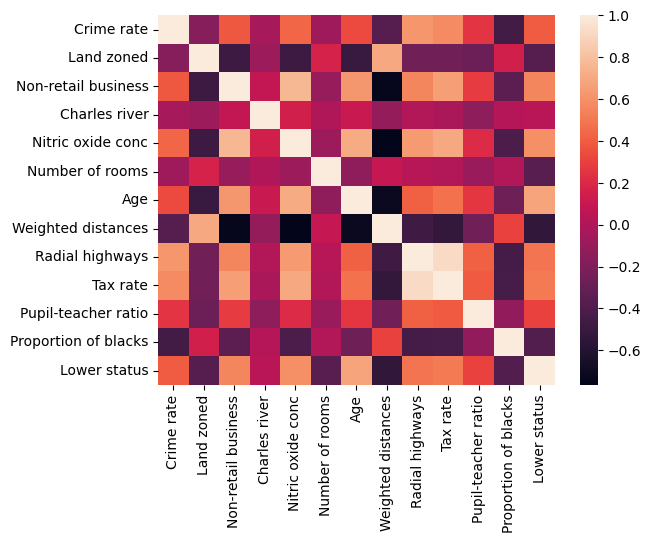

In [8]:
corr =df.select_dtypes("number").drop(columns ="value of homes").corr()
sns.heatmap(corr)

Split

In [9]:
#get features
features = ['Crime rate', 'Land zoned', 'Non-retail business', 'Charles river',
       'Nitric oxide conc', 'Number of rooms', 'Age', 'Weighted distances',
       'Radial highways', 'Tax rate', 'Pupil-teacher ratio',
       'Proportion of blacks', 'Lower status'
]
X_train=df[features]
X_train.head()
#X_train  = df.drop(columns="value of homes")
#X_train.head()

,Crime rate,Land zoned,Non-retail business,Charles river,Nitric oxide conc,Number of rooms,Age,Weighted distances,Radial highways,Tax rate,Pupil-teacher ratio,Proportion of blacks,Lower status
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15


In [10]:
target = "value of homes"
y_train = df[target]


In [11]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("Mean home value:",y_mean)
print("Baseline MAE:", mean_absolute_error(y_train,y_pred_baseline))

Mean home value: 19.560119047619047
Baseline MAE: 3.656296060090703


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]


array([25.25657965, 22.77382546, 23.78560043, 21.4951302 , 18.14578761])

In [14]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print(f'mae_training: {mae_training}')
print(f" The mae_training < mae_baseline - therefore, model provides better prediction") 

mae_training: 1.7340610296103267
 The mae_training < mae_baseline - therefore, model provides better prediction


In [15]:
#extract intercept
intercept = model.intercept_
intercept


33.61319388123894

In [35]:
#extract coefficient
coefficients= model.coef_
feature_names= ['Crime rate', 'Land zoned', 'Non-retail business', 'Charles river',
       'Nitric oxide conc', 'Number of rooms', 'Age', 'Weighted distances',
       'Radial highways', 'Tax rate', 'Pupil-teacher ratio',
       'Proportion of blacks', 'Lower status'
]

coefficient_series = pd.Series(coefficients, index=feature_names)
coefficient_series 


Crime rate             -0.129002
Land zoned              0.005158
Non-retail business     0.069984
Charles river           1.605077
Nitric oxide conc      -9.633862
Number of rooms         1.488638
Age                    -0.019573
Weighted distances     -0.588704
Radial highways         0.165296
Tax rate               -0.008903
Pupil-teacher ratio    -0.517850
Proportion of blacks    0.007367
Lower status           -0.414114
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

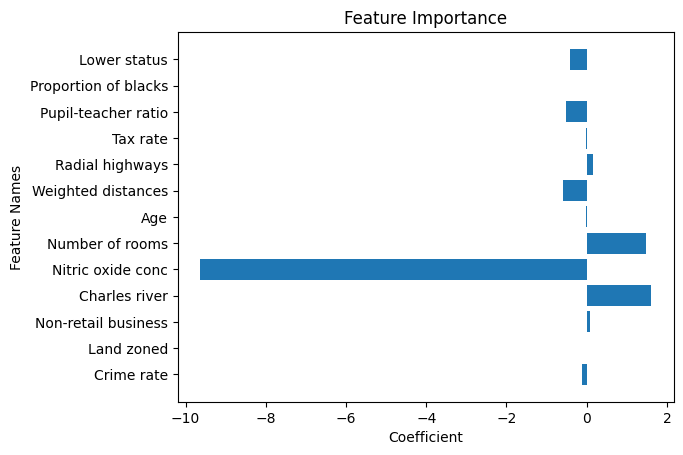

In [38]:
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Feature Names')
plt.title('Feature Importance')